In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
h_a = np.loadtxt('../../Data/data_39_lowSI.txt', dtype=float)

# h_a = h_a * 0.1242
h_a = h_a[h_a>0]
h_a = h_a[1::20]

avr = np.average(h_a)
h_a = h_a/avr
h_a = h_a.reshape(-1,1)

In [3]:
N_train = 3500
N_test = 1000
timesteps = 16

train_data = h_a[:N_train].reshape(-1,1)
test_data = h_a[N_train:(N_train + N_test)].reshape(-1,1)

In [4]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
print(train_data_timesteps.shape)

test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
print(test_data_timesteps.shape)

(3485, 16)
(985, 16)


In [5]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3485, 15) (3485, 1)
(985, 15) (985, 1)


In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train.shape, x_test.shape

((3485, 15, 1), (985, 15, 1))

# Setup of the RNN Models and Running Them

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

tf.random.set_seed(42)

model = Sequential([
    LSTM(70, return_sequences=True, input_shape=(x_train.shape[1],1)),
    Dropout(0.001),

    LSTM(70, return_sequences=False),
    Dropout(0.001),

    Dense(1),

])
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 70)            20160     
                                                                 
 dropout (Dropout)           (None, 15, 70)            0         
                                                                 
 lstm_1 (LSTM)               (None, 70)                39480     
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 59,711
Trainable params: 59,711
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Training the model
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 32,
    verbose = 1,
)

Epoch 1/5
109/109 [==============================] - 7s 18ms/step - loss: 0.0733
Epoch 2/5
109/109 [==============================] - 2s 18ms/step - loss: 0.0263
Epoch 3/5
109/109 [==============================] - 2s 18ms/step - loss: 0.0239
Epoch 4/5
109/109 [==============================] - 2s 19ms/step - loss: 0.0209
Epoch 5/5
109/109 [==============================] - 2s 19ms/step - loss: 0.0229


In [9]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

31/31 [==============================] - 0s 6ms/step


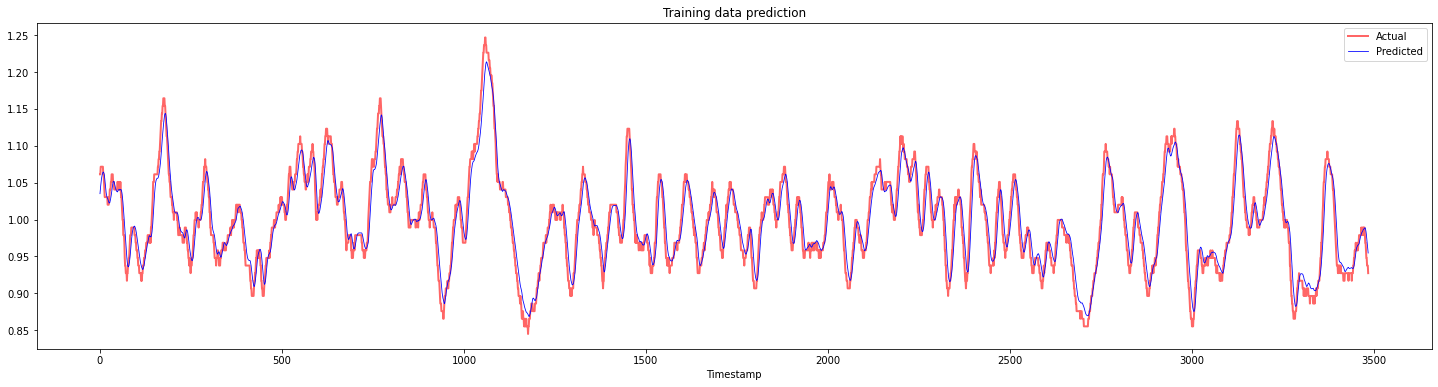

In [10]:
plt.figure(figsize=(25,6))
plt.plot(y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

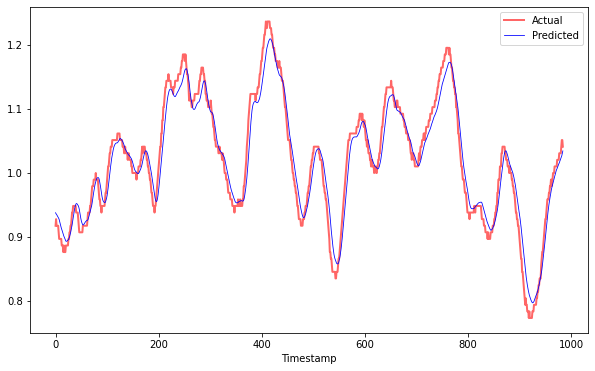

In [11]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import math

MSE = mean_squared_error(y_test, y_test_pred)
RMSE = math.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)

print('MSE = ', MSE)
print('RMSE = ', RMSE)
print('MAE = ', MAE)
print('MAPE = ', MAPE)

MSE =  0.00047391733372936524
RMSE =  0.021769642480513208
MAE =  0.01784335583571662
MAPE =  0.017686951553965546


# Check model performance on full dataset

In [13]:
# data_timesteps=np.array([[j for j in h_a[i:i+timesteps]] for i in range(0,len(h_a)-timesteps+1)])[:,:,0]
# print("Tensor shape: ", data_timesteps.shape)

# # Selecting inputs and outputs from data
# X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
# X = np.reshape(X, (X.shape[0], X.shape[1], 1))
# print("X shape: ", X.shape,"\nY shape: ", Y.shape)

In [14]:
# Make model predictions
# Y_pred = model.predict(X).reshape(-1,1)

In [15]:
# print('RMSE: ', math.sqrt(mean_squared_error(Y, Y_pred)))